In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

In [47]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np 

# Get data 

In [27]:
path =".\\household_power_consumption.txt"
data = pd.read_csv(path, delimiter= ";", nrows=2*60*24)

In [28]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [36]:
len(data)

2880

In [35]:
# remove data and time (for simplicity)
X = data.iloc[:,2:]

# Cluster analysis 

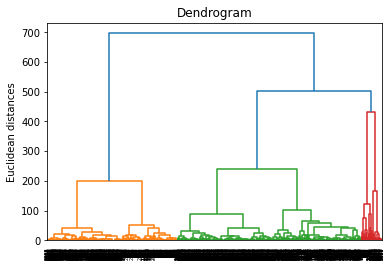

In [38]:
dendro = dendrogram(linkage(X, method  = "ward", metric="euclidean"))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

# Modelling 

In [40]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

In [43]:
y_hc = cluster.fit_predict(X)

In [44]:
y_hc

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [45]:
X["cluster"] = y_hc

# Visualization 

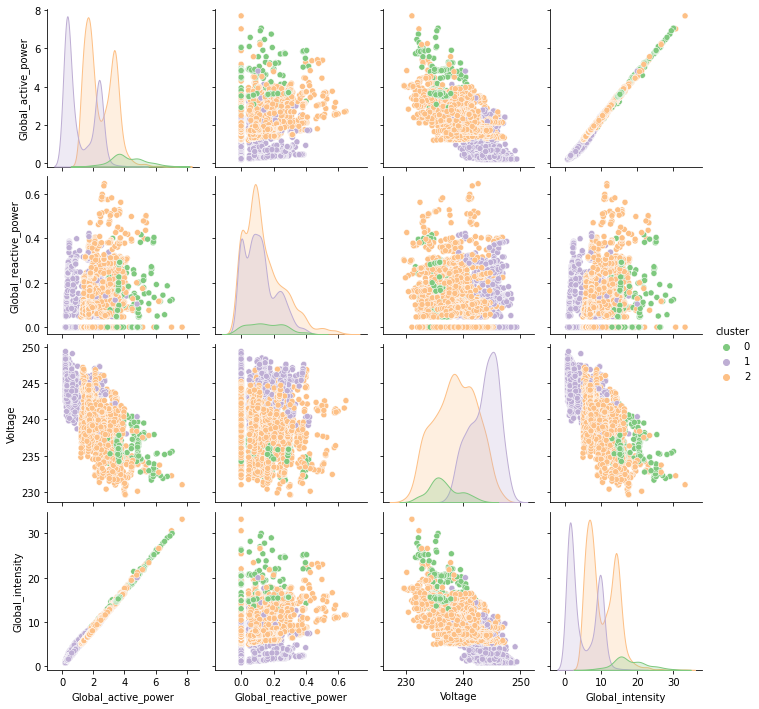

In [54]:
var = ["Global_active_power", "Global_reactive_power","Voltage","Global_intensity"]

sns.pairplot(data = X, vars=var ,hue="cluster", palette="Accent")

# Mitage Outliers 

In [64]:
X = np.sqrt(X)

In [65]:
X["cluster"] = cluster.fit_predict(X)

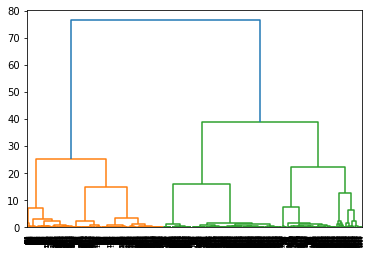

In [70]:
dendrogram(linkage(X,method = "ward",metric= "euclidean"))
plt.show()

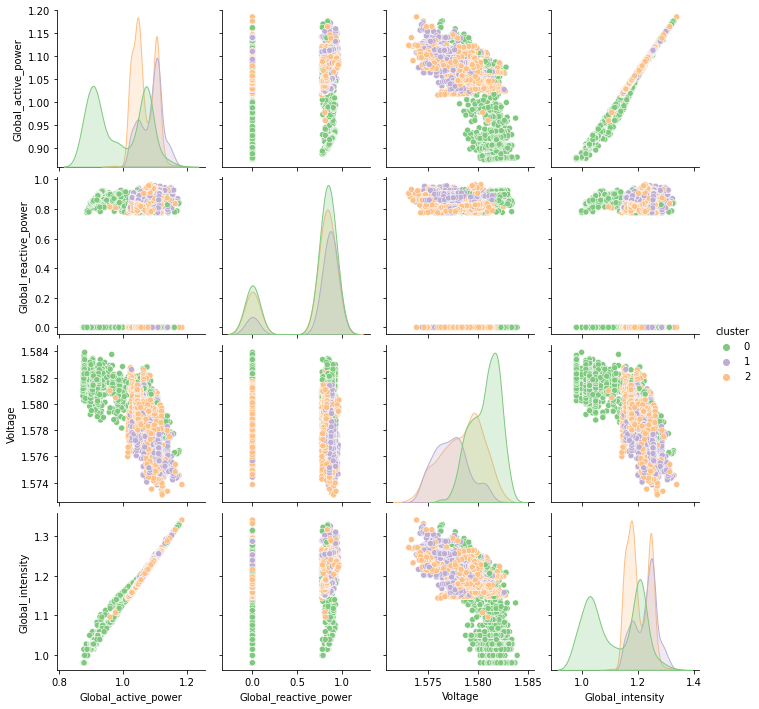

In [68]:
sns.pairplot(data = X, vars=var ,hue="cluster", palette="Accent")